In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,0.0,0.0
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,0.0,0.0
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0


<Axes: xlabel='Date'>

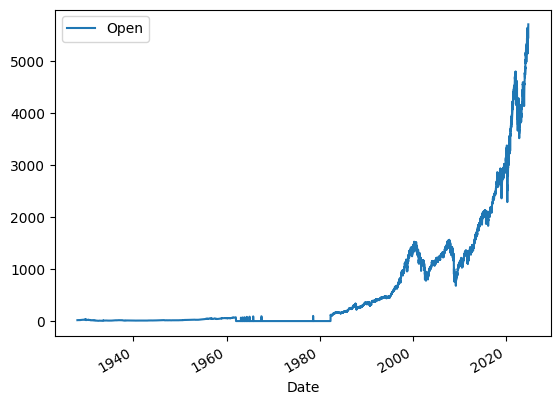

In [4]:
sp500.plot.line(y = "Open", use_index = True)

In [5]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
predictors = ["Open","High","Low","Close","Volume"]

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,5618.259766
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805


In [11]:
sp500["Growth"] = (sp500["Close"] < sp500["Tomorrow"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Growth
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,5618.259766,0
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137,1
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Growth
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,5618.259766,0
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137,1
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0


In [13]:
x = sp500[["Open","High","Low","Close","Volume"]]
y = sp500["Growth"]

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 20, test_size = 0.2, shuffle = True)

In [15]:
train_x

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-28 00:00:00-04:00,1865.000000,1877.010010,1850.609985,1869.430054,4034680000
1999-10-21 00:00:00-04:00,1289.430054,1289.430054,1265.609985,1283.609985,1012500000
1995-01-17 00:00:00-05:00,469.380005,470.149994,468.190002,470.049988,331520000
2003-11-05 00:00:00-05:00,1053.250000,1054.540039,1044.880005,1051.810059,1401800000
1997-06-04 00:00:00-04:00,845.479980,845.549988,838.820007,840.109985,466690000
...,...,...,...,...,...
2013-06-14 00:00:00-04:00,1635.520020,1640.800049,1623.959961,1626.729980,2939400000
2005-07-12 00:00:00-04:00,1219.439941,1225.540039,1216.599976,1222.209961,1932010000
2018-01-19 00:00:00-05:00,2802.600098,2810.330078,2798.080078,2810.300049,3724230000


In [16]:
test_x

,Open,High,Low,Close,Volume
Date,,,,,
2011-08-01 00:00:00-04:00,1292.589966,1307.380005,1274.729980,1286.939941,4967390000
2018-11-06 00:00:00-05:00,2738.399902,2756.820068,2737.080078,2755.449951,3543800000
2010-06-02 00:00:00-04:00,1073.010010,1098.560059,1072.030029,1098.380005,5026360000
1999-10-18 00:00:00-04:00,1247.410034,1254.130005,1233.699951,1254.130005,818700000
2006-08-01 00:00:00-04:00,1278.530029,1278.660034,1265.709961,1270.920044,2527690000
...,...,...,...,...,...
1999-10-13 00:00:00-04:00,1313.040039,1313.040039,1282.800049,1285.550049,821500000
2010-02-09 00:00:00-05:00,1060.060059,1079.280029,1060.060059,1070.520020,5114260000
1995-01-16 00:00:00-05:00,465.970001,470.390015,465.970001,469.380005,315810000


In [17]:
train_y

Date
2014-04-28 00:00:00-04:00    1
1999-10-21 00:00:00-04:00    1
1995-01-17 00:00:00-05:00    0
2003-11-05 00:00:00-05:00    1
1997-06-04 00:00:00-04:00    1
                            ..
2013-06-14 00:00:00-04:00    1
2005-07-12 00:00:00-04:00    1
2018-01-19 00:00:00-05:00    1
2019-05-03 00:00:00-04:00    0
2007-04-30 00:00:00-04:00    1
Name: Growth, Length: 6998, dtype: int64

In [18]:
test_y

Date
2011-08-01 00:00:00-04:00    0
2018-11-06 00:00:00-05:00    1
2010-06-02 00:00:00-04:00    1
1999-10-18 00:00:00-04:00    1
2006-08-01 00:00:00-04:00    1
                            ..
1999-10-13 00:00:00-04:00    0
2010-02-09 00:00:00-05:00    0
1995-01-16 00:00:00-05:00    1
2009-06-29 00:00:00-04:00    0
2010-12-06 00:00:00-05:00    1
Name: Growth, Length: 1750, dtype: int64

In [19]:
model = XGBRegressor()

model.fit(train_x, train_y, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
y_predictions = model.predict(test_x)
y_predictions

array([0.4109883 , 0.63120383, 0.09451624, ..., 0.5943014 , 0.47850743,
       0.5500081 ], dtype=float32)

In [21]:
test_y

Date
2011-08-01 00:00:00-04:00    0
2018-11-06 00:00:00-05:00    1
2010-06-02 00:00:00-04:00    1
1999-10-18 00:00:00-04:00    1
2006-08-01 00:00:00-04:00    1
                            ..
1999-10-13 00:00:00-04:00    0
2010-02-09 00:00:00-05:00    0
1995-01-16 00:00:00-05:00    1
2009-06-29 00:00:00-04:00    0
2010-12-06 00:00:00-05:00    1
Name: Growth, Length: 1750, dtype: int64

In [22]:
#Not great
mean_absolute_error(test_y, y_predictions)

np.float64(0.49135594711452724)

In [23]:
forest_model = RandomForestRegressor()

In [24]:
forest_model.fit(train_x,train_y)

RandomForestRegressor()

In [25]:
forest_predictions = forest_model.predict(test_x)

In [26]:
forest_predictions

array([0.2 , 0.69, 0.2 , ..., 0.65, 0.45, 0.43])

In [27]:
mean_absolute_error(test_y, forest_predictions)

np.float64(0.4898571428571429)

In [28]:
classifier_forest = RandomForestClassifier(n_estimators = 1000, random_state = 2, min_samples_split = 100)
classifier_forest.fit(train_x,train_y)

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=2)

In [29]:
classifier_pred = classifier_forest.predict(test_x)
classifier_pred

array([0, 1, 0, ..., 0, 1, 1])

In [30]:
mean_absolute_error(test_y, classifier_pred)

np.float64(0.4702857142857143)

<Axes: xlabel='Date'>

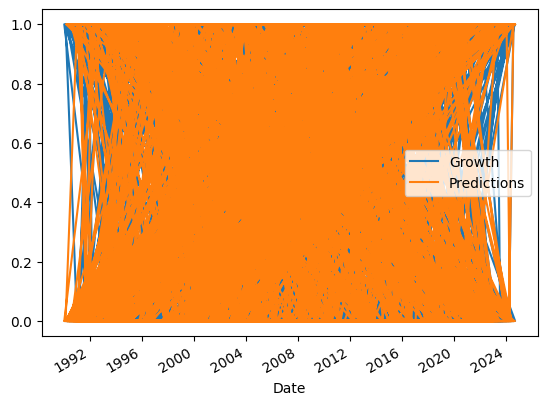

In [31]:
classifier_pred = pd.Series(classifier_pred, index = test_x.index, name = "Predictions")
comb = pd.concat([test_y, classifier_pred], axis = 1)
comb.plot()

#### Now, we are going to create a predict function to make all of this a little bit nicer looking and easier

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Growth"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Growth"], preds], axis = 1)
    return combined

In [43]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [44]:
model = RandomForestClassifier()

In [45]:
predictions = backtest(sp500, model, predictors)

In [46]:
predictions

,Growth,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,1
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,1
...,...,...
2024-09-17 00:00:00-04:00,0,0
2024-09-18 00:00:00-04:00,1,0
2024-09-19 00:00:00-04:00,0,0


In [47]:
predictions["Predictions"].value_counts()

Predictions
0    3514
1    2734
Name: count, dtype: int64

In [49]:
 mean_absolute_error(predictions["Growth"],predictions["Predictions"])

np.float64(0.5033610755441741)

### Still not a great estimate, the model is still basically just as good as guessing

In [50]:
predictions["Growth"].value_counts()/ predictions.shape[0]

Growth
1    0.535691
0    0.464309
Name: count, dtype: float64

In [51]:
predictions["Predictions"].value_counts()/predictions.shape[0]

Predictions
0    0.56242
1    0.43758
Name: count, dtype: float64

### It appears that our model tends to predict that the market will go down a lot more than it actually does

### Now, we will try and use additional information to get a trend of data to help improve our model

In [54]:
past_days = [1,3,5,30,90,365,1095]
new_predictors = []

for day in past_days:
    rolling_average = sp500.rolling(day).mean()
    ratio_column = f"Close_Ratio_{day}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

    trend_column = f"Trend_{day}"
    sp500[trend_column] = sp500.shift(1).rolling(day).sum()["Growth"]

    new_predictors += [ratio_column, trend_column]

In [55]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Growth,Close_Ratio_1,Trend_1,Close_Ratio_3,...,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_90,Trend_90,Close_Ratio_365,Trend_365,Close_Ratio_1095,Trend_1095
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,1.0,0.0,0.993381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,1.0,0.0,0.990597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.0,1.0,0.999727,...,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,5618.259766,0,1.0,1.0,1.000595,...,1.004611,5.0,1.021299,20.0,1.033607,56.0,1.173125,206.0,1.323584,589.0
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137,1,1.0,0.0,0.998155,...,0.999416,4.0,1.016019,19.0,1.029765,55.0,1.168709,206.0,1.318973,589.0
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0,1.0,1.0,1.010281,...,1.012138,4.0,1.030076,20.0,1.046201,55.0,1.187461,206.0,1.340533,590.0


In [58]:
#Dropping null values
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Growth,Close_Ratio_1,Trend_1,Close_Ratio_3,...,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_90,Trend_90,Close_Ratio_365,Trend_365,Close_Ratio_1095,Trend_1095
Date,,,,,,,,,,,,,,,,,,,,,
1994-05-02 00:00:00-04:00,450.910004,453.570007,449.049988,453.019989,296130000,453.029999,1,1.0,1.0,1.004457,...,1.003318,3.0,1.002545,12.0,0.975572,47.0,1.000031,187.0,1.132947,561.0
1994-05-03 00:00:00-04:00,453.059998,453.980011,450.510010,453.029999,288270000,451.720001,0,1.0,1.0,1.001570,...,1.003198,3.0,1.003902,12.0,0.975927,47.0,0.999875,187.0,1.132728,562.0
1994-05-04 00:00:00-04:00,453.040009,453.109985,449.869995,451.720001,267940000,451.380005,0,1.0,0.0,0.998078,...,1.000363,3.0,1.002245,12.0,0.973470,46.0,0.996833,186.0,1.129205,562.0
1994-05-05 00:00:00-04:00,451.720001,452.820007,450.720001,451.380005,255690000,447.820007,0,1.0,0.0,0.998533,...,0.998602,3.0,1.002782,11.0,0.973183,45.0,0.995924,186.0,1.128100,562.0
1994-05-06 00:00:00-04:00,451.369995,451.369995,445.640015,447.820007,291910000,442.320007,0,1.0,0.0,0.994478,...,0.992082,2.0,0.996402,11.0,0.966043,44.0,0.987949,185.0,1.118962,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16 00:00:00-04:00,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,5634.580078,1,1.0,1.0,1.002634,...,1.009351,5.0,1.023802,19.0,1.034275,55.0,1.173842,205.0,1.324002,589.0
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,5618.259766,0,1.0,1.0,1.000595,...,1.004611,5.0,1.021299,20.0,1.033607,56.0,1.173125,206.0,1.323584,589.0
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137,1,1.0,0.0,0.998155,...,0.999416,4.0,1.016019,19.0,1.029765,55.0,1.168709,206.0,1.318973,589.0


### With this, we now can see the trend of the data as well as the ratio of the closing price of the sp500 compared to 1,3,5,30,90 days, and 1 and 3 years ago

With this new information, we can now use it to improve our model

In [56]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Growth"])
    preds = model.predict_proba(test[predictors])[:,1]
    # With the probabilities of each day now, we can modify the data a little bit
    # We must now be more confident if we want to buy a stock
    preds[preds >= .55] = 1
    preds[preds < .55] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Growth"], preds], axis = 1)
    return combined 

In [59]:
#Using our new_predictors array to analyze the trends of the data, and not just numbers
predictions = backtest(sp500, model, new_predictors)

In [60]:
predictions["Predictions"].value_counts()

Predictions
0.0    2779
1.0    2373
Name: count, dtype: int64

### Much more event distribution of selling and buying

In [61]:
predictions

,Growth,Predictions
Date,,
2004-04-02 00:00:00-05:00,1,1.0
2004-04-05 00:00:00-04:00,0,0.0
2004-04-06 00:00:00-04:00,0,1.0
2004-04-07 00:00:00-04:00,0,1.0
2004-04-08 00:00:00-04:00,1,0.0
...,...,...
2024-09-16 00:00:00-04:00,1,0.0
2024-09-17 00:00:00-04:00,0,0.0
2024-09-18 00:00:00-04:00,1,1.0


In [62]:
mean_absolute_error(predictions["Growth"],predictions["Predictions"])

np.float64(0.5060170807453416)

### Still not good, probably because 1. We still have a pretty low threshold of buying vs selling (only 55% confidence) and 2. Mean value score is now not a good measure to determine the success rate of our model, as we now need to compare really only the times we actually want to buy a stock

First, we will modify our predict function to have a higher degree of confidence

In [63]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Growth"])
    preds = model.predict_proba(test[predictors])[:,1]
    # With the probabilities of each day now, we can modify the data a little bit
    # We must now be more confident if we want to buy a stock
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Growth"], preds], axis = 1)
    return combined 

Next, we will use precision score instead of mean absolute error. This way, we can keep track of false positives rather than all of the errors, as we do not care about false negatives. 

In [64]:
from sklearn.metrics import precision_score

In [65]:
predictions = backtest(sp500, model, new_predictors)

In [66]:
predictions["Predictions"].value_counts()

Predictions
0.0    3715
1.0    1437
Name: count, dtype: int64

In [67]:
precision_score(predictions["Growth"],predictions["Predictions"])

np.float64(0.5504523312456506)

### Here, we can see that with the made changes, our model succesfully predicts when a stock goes up around 55% of the time. Now, we will try and modify our model to get slightly better results

In [71]:
def find_model():
    max_score = 0
    parameters = []
    for i in range(300,1000,100):
        for j in range(10,100,10):
            model = RandomForestClassifier(n_estimators = i, min_samples_split = j, random_state = 1)
            pred = backtest(sp500, model, new_predictors)
            score = precision_score(pred["Growth"],pred["Predictions"])
            if (max_score < score):
                max_score = score
                parameters = [i,j]
    return [max_score, parameters]

In [72]:
find_model()

[np.float64(0.5710144927536231), [700, 50]]

### Here, we can see that after tuning the parameters of the moedl, having n_estimators of 700 and a min_sample_split of 50 gave us sligh